## Get data


[This](https://population.un.org/wpp/DVD/Files/2_Indicators%20(Probabilistic%20Projections)/UN_PPP2017_Output_PopTot.xls) is data is from United Nations population division. The dataset is prediction of world population from 2015 till 2100 with 5 years interval. We are taking a small subset of the data extracted which can be found in `data/world_population.csv`.


In [23]:
import pandas as pd

In [7]:
df = pd.read_csv('../data/world_population.csv')
df.head()

,Year,World Population
0,2015,7383009
1,2020,7795482
2,2025,8185614
3,2030,8551199
4,2035,8892702


# Set Index

setting of indices of time series column
* easy to understand the data
* In order to simplify plotting and computations, 
* as well as for reference for rolling or moving averages preferred compared to indices
* Uniqueness of rows are maintained


In [8]:
df.set_index('Year', inplace=True)
df.head()

,World Population
Year,
2015,7383009
2020,7795482
2025,8185614
2030,8551199
2035,8892702


## Plotting Data

In [ ]:
# Setting up plotting options 
import matplotlib.pyplot as plt

from pylab import rcParams
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

plt.style.use('ggplot')

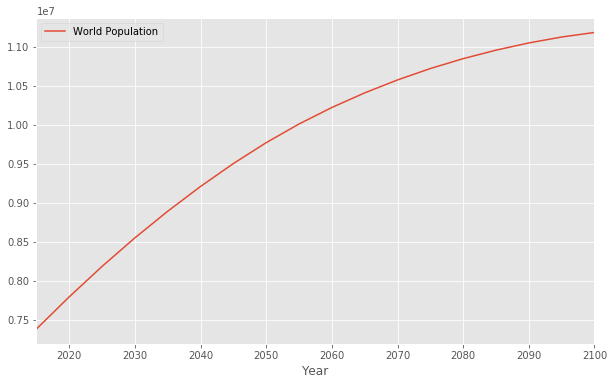

In [14]:
df.plot()

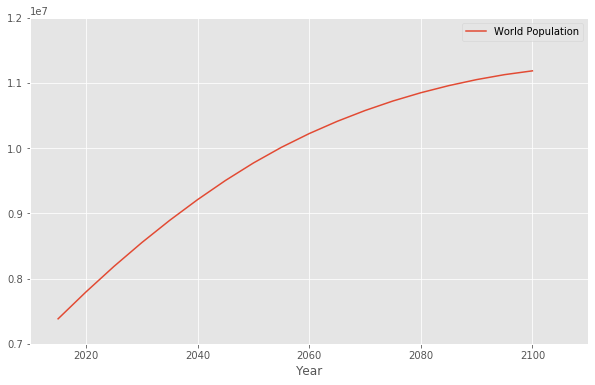

In [22]:
# Changing the x-limit and y-limit for better readability
df.plot(xlim=(2010, 2110), ylim=(7e6,12e6))